### Load data

In [ ]:
import sys
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

sys.path.append("../src")
import data_prep

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)



df_resampled = data_prep.make_dataframe()

# ADDING SENTIMENT AND CATEGORY COLUMNS
with open("../data/sentiment_columns.pkl", "rb") as f:
    sentiment_columns = pickle.load(f)

with open("../data/category_columns_5.pkl", "rb") as f:
    category_columns = pickle.load(f)

with open("../data/embedding_columns_5.pkl", "rb") as f:
    embedding_columns = pickle.load(f)


df_resampled = df_resampled.merge(sentiment_columns, on="new_id", how="left")

df_resampled = df_resampled.merge(category_columns, on="new_id", how="left")

df_resampled = df_resampled.merge(embedding_columns, on="new_id", how="left")

### Sentiment predictions Metrics

In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

rating_to_sentiment = {
    1: 'negative',
    2: 'negative',
    3: 'neutral',
    4: 'positive',
    5: 'positive'
}


df_resampled['reviews_sentiment'] = df_resampled['reviews.rating'].map(rating_to_sentiment)
y_true = df_resampled['reviews_sentiment']
y_pred = df_resampled['sentiment']

accuracy_score(y_pred, y_true)
recall_score(y_pred, y_true, average='macro')
#precision_score(y_pred, y_true, average='macro')
#confusion_matrix(y_pred, y_true)
print(classification_report(y_pred, y_true))


              precision    recall  f1-score   support

    negative       0.82      0.55      0.65      3542
     neutral       0.17      0.20      0.19      2277
    positive       0.96      0.97      0.97     55267

    accuracy                           0.92     61086
   macro avg       0.65      0.57      0.60     61086
weighted avg       0.92      0.92      0.92     61086



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# Convert to string and handle missing values
y_true = df_resampled['reviews_sentiment'].astype(str)
y_pred = df_resampled['sentiment'].astype(str)
#Accuracy
acc_score = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
print(f"Accuracy Score: {acc_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy Score: 0.9194
Precision: 0.5742
Recall: 0.6506
F1-score: 0.6028


### Selecting the right number of categories

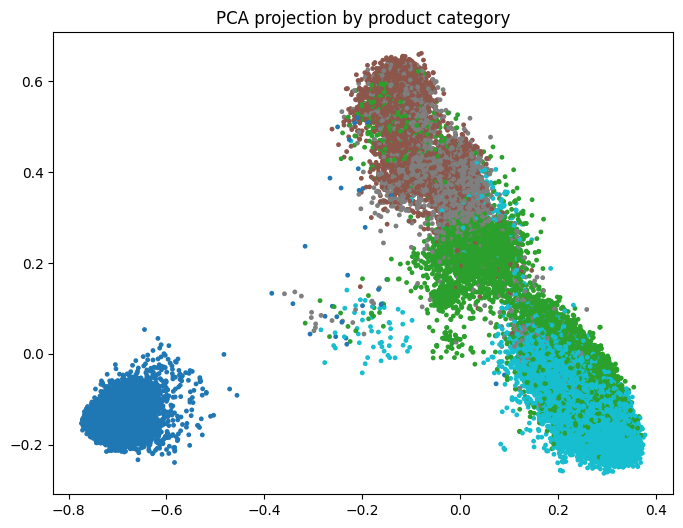

Silhouette: 0.15231006580076362
Calinski-Harabasz: 8805.31565944616
Davies-Bouldin: 3.380056821022272


In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Your embeddings should be a list of lists/arrays (each 1000-d vector)
embeddings = df_resampled["review_embedding"].tolist()

# Reduce to 2D
pca = PCA(n_components=2, random_state=42)
emb_2d = pca.fit_transform(embeddings)

# Convert product categories to numeric codes for coloring
category_codes = df_resampled["predicted_product_category"].astype("category").cat.codes

plt.figure(figsize=(8,6))
plt.scatter(emb_2d[:,0], emb_2d[:,1], c=category_codes, cmap="tab10", s=6)
plt.title("PCA projection by product category")
plt.show()

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

X = df_resampled["review_embedding"].tolist()
labels = df_resampled["predicted_product_category"]

sil = silhouette_score(X, labels)
ch  = calinski_harabasz_score(X, labels)
db  = davies_bouldin_score(X, labels)
print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)